In [0]:
dbutils.fs.ls("/FileStore/tables/")


Out[56]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023/', name='clinicaltrial_2023/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023-1.zip', name='clinicaltrial_2023-1.zip', size=57166668, modificationTime=1713832661000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1714267895000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.zip', name='clinicaltrial_2023.zip', size=57166668, modificationTime=1712589310000),
 FileInfo(path='dbfs:/FileStore/tables/pharma-1.zip', name='pharma-1.zip', size=109982, modificationTime=1713832611000),
 FileInfo(path='dbfs:/FileStore/tables/pharma.csv/', name='pharma.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/pharma.zip', name='pharma.zip', size=109982, modificationTime=1712589332000),
 FileInfo(path='dbfs:/FileStore/tables/steam_200k-1.csv', name='steam_200k-1.csv', size=8059447, mo

In [0]:
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2023.zip", "file:/tmp/")

Out[57]: True

In [0]:
%sh
ls /tmp/


Rserv
RtmpRaJnVT
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-790d4a5019f64355a89d91d29f3085cf-apache2.service-zzIDHg
systemd-private-790d4a5019f64355a89d91d29f3085cf-ntp.service-5svWvf
systemd-private-790d4a5019f64355a89d91d29f3085cf-systemd-logind.service-myD4Re
systemd-private-790d4a5019f64355a89d91d29f3085cf-systemd-resolved.service-bxCkfj
tmp.20zxoa5NcE


In [0]:
%sh
unzip -d /tmp/ /tmp/clinicaltrial_2023.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  


In [0]:
%sh
ls /tmp/clinicaltrial_2023.csv


/tmp/clinicaltrial_2023.csv


In [0]:
dbutils.fs.mkdirs("FileStore/tables")

Out[61]: True

In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2023.csv", "/FileStore/tables/clinicaltrial_2023.csv", True)


Out[62]: True

In [0]:
dbutils.fs.ls("FileStore/tables/clinicaltrial_2023.csv/")

Out[63]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1714268128000)]

In [0]:
dbutils.fs.head("FileStore/tables/clinicaltrial_2023.csv")

[Truncated to first 65536 bytes]
Out[64]: '"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02

In [0]:
janirdd = sc.textFile('/FileStore/tables/clinicaltrial_2023.csv')

In [0]:
janirdd.take(5)

Out[66]: ['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
#cleanig rdd for clinicaltrial_2023.csv
from pyspark.sql import Row
cleanedRDD = janirdd.filter(lambda line: line.strip() != '')
fieldsRDD = cleanedRDD.map(lambda line: line.split('\t'))
cleanRDD = fieldsRDD.map(lambda row: [field.rstrip(',') for field in row])
cleanRDD = cleanRDD.map(lambda fields: [field.replace('"', '') for field in fields])


In [0]:
cleanRDD.take(10)

Out[68]: [['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascula

In [0]:

cleanedData = cleanRDD.collect()
for row in cleanedData:
    print(row)

def cleaned_row(row):
    if len(row) < 14:
        return row  
    row = row[:5] + [intervention for field in row[5].split('|') for intervention in field.split(':')] + row[6:]
    row = row[:7] + [collaborator.strip() for collaborator in row[7].split('|')] + row[8:] if row[7] else row[:7] + [] + row[8:]
    row = row[:11] + [design for field in row[11].split('|') for design in field.split(':')] + row[12:]

    return row

['Id', 'Study Title', 'Acronym', 'Status', 'Conditions', 'Interventions', 'Sponsor', 'Collaborators', 'Enrollment', 'Funder Type', 'Type', 'Study Design', 'Start', 'Completion']
['NCT03630471', 'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India', 'PRIDE', 'COMPLETED', 'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)', "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care", 'Sangath', 'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine', '250.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT', '2018-08-20', '2019-02-28']
['NCT05992571', 'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity', '', 'RECRUITING', 'Cerebrovascular Function|Cognition', 'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB', 'McMast

In [0]:
header = cleanRDD.first()
cleanheaderRDD=cleanRDD.filter(lambda row: row != header)

In [0]:
header

Out[71]: ['Id',
 'Study Title',
 'Acronym',
 'Status',
 'Conditions',
 'Interventions',
 'Sponsor',
 'Collaborators',
 'Enrollment',
 'Funder Type',
 'Type',
 'Study Design',
 'Start',
 'Completion']

In [0]:
#question 1
question1 = cleanheaderRDD.map(lambda x:  x[0])
question1 = question1.distinct().count()
print(f"  distinct studies.: {question1}")

  distinct studies.: 483422


In [0]:
##question 2
from operator import add

def count_types(row):
    if len(row) < 11:
        return []  
    study_type = row[10]
    if study_type == '':
        return []  
    
    return [(study_type, 1)]

counts = cleanheaderRDD.flatMap(count_types)\
                  .reduceByKey(add)\
                  .map(lambda x: (x[1], x[0]))\
                  .sortByKey(ascending=False)\
                  .map(lambda x: (x[1], x[0]))\
                  .collect()

for count in counts:
    print(count)

('INTERVENTIONAL', 371382)
('OBSERVATIONAL', 110221)
('EXPANDED_ACCESS', 928)


In [0]:
cleanheaderRDD.take(5)

Out[74]: [['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cognition',
  'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB',
  'McMaster University',
  "Alzheimer's Society of Brant, Haldimand Norfolk, Hamilton Halton",
  '30.0',
  'OTHER',
  'INTERVENTIONAL',
 

In [0]:
question2 = cleanheaderRDD.map(lambda x:  x[4])
question2.collect()

Out[75]: ['Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
 'Cerebrovascular Function|Cognition',
 'Myocardial Infarct|Hyperglycemia',
 'Decompensated Cirrhosis|Liver Transplantation',
 'Hypertension|Treatment Adherence and Compliance|Digital Health',
 'Smoking|Alcohol Drinking|Prescription Drug Abuse|Substance-Related Disorders|Oral Intake Reduced',
 'Alcohol Dependence|PTSD',
 'Alcohol; Harmful Use|Binge Drinking|Risk Behavior|HIV Infection',
 'Smoking Cessation',
 'Glioma|Hematopoietic and Lymphoid Cell Neoplasm|Malignant Solid Neoplasm|Melanoma|Sarcoma',
 'Hyperhidrosis',
 'Juvenile Myoclonic Epilepsy',
 'HIV Infections',
 'Wellbeing|Health Attitude|Quality of Life',
 'Coronary Artery Disease',
 'Progressive Multiple Sclerosis',
 'Obstructive Sleep Apnea Syndrome',
 'Coronavirus Infection',
 'Registered Nurses|Nursing Personnel|Motor Skills',
 'Kidney Cancer',
 'Treatment Resistant Depression',
 'Sepsis',
 'Inflammatory Bowel Diseases|Croh

In [0]:
#question3
question3 = question2.flatMap(lambda row: row.split("|"))\
    .filter((lambda row: row!=''))\
    .map(lambda x : (x,1))\
    .reduceByKey(lambda a , b : a + b)\
    .sortBy(lambda x: x[1] , ascending= False)
question3.take (5)

Out[76]: [('Healthy', 9731),
 ('Breast Cancer', 7502),
 ('Obesity', 6549),
 ('Stroke', 4072),
 ('Hypertension', 4020)]

In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[77]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023/', name='clinicaltrial_2023/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023-1.zip', name='clinicaltrial_2023-1.zip', size=57166668, modificationTime=1713832661000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1714268128000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.zip', name='clinicaltrial_2023.zip', size=57166668, modificationTime=1712589310000),
 FileInfo(path='dbfs:/FileStore/tables/pharma-1.zip', name='pharma-1.zip', size=109982, modificationTime=1713832611000),
 FileInfo(path='dbfs:/FileStore/tables/pharma.csv/', name='pharma.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/pharma.zip', name='pharma.zip', size=109982, modificationTime=1712589332000),
 FileInfo(path='dbfs:/FileStore/tables/steam_200k-1.csv', name='steam_200k-1.csv', size=8059447, mo

In [0]:
dbutils.fs.cp("/FileStore/tables/pharma.zip", "file:/tmp/")


Out[78]: True

In [0]:
%sh
ls /tmp/

Rserv
RtmpRaJnVT
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-790d4a5019f64355a89d91d29f3085cf-apache2.service-zzIDHg
systemd-private-790d4a5019f64355a89d91d29f3085cf-ntp.service-5svWvf
systemd-private-790d4a5019f64355a89d91d29f3085cf-systemd-logind.service-myD4Re
systemd-private-790d4a5019f64355a89d91d29f3085cf-systemd-resolved.service-bxCkfj
tmp.20zxoa5NcE


In [0]:
%sh
unzip -d /tmp/ /tmp/pharma.zip

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
%sh
ls /tmp/pharma.csv


/tmp/pharma.csv


In [0]:
dbutils.fs.mkdirs("FileStore/tables/pharma.csv")

Out[82]: True

In [0]:
dbutils.fs.mv("file:/tmp/pharma.csv", "/FileStore/tables/pharma.csv", True)

Out[83]: True

In [0]:
dbutils.fs.ls("FileStore/tables/pharma.csv/")

Out[84]: [FileInfo(path='dbfs:/FileStore/tables/pharma.csv/pharma.csv', name='pharma.csv', size=678999, modificationTime=1714268232000)]

In [0]:

from pyspark.sql import Row

janikhanrdd = sc.textFile('/FileStore/tables/pharma.csv/pharma.csv')
fieldsRDD = janikhanrdd.map(lambda line: line.split(','))
cleanRDD = fieldsRDD.map(lambda fields: [field.replace('"', '') for field in fields])
cleanedData = cleanRDD.collect()
for row in cleanedData:
    print(row)


['Company', 'Parent_Company', 'Penalty_Amount', 'Subtraction_From_Penalty', 'Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting', 'Penalty_Year', 'Penalty_Date', 'Offense_Group', 'Primary_Offense', 'Secondary_Offense', 'Description', 'Level_of_Government', 'Action_Type', 'Agency', 'Civil/Criminal', 'Prosecution_Agreement', 'Court', 'Case_ID', 'Private_Litigation_Case_Title', 'Lawsuit_Resolution', 'Facility_State', 'City', 'Address', 'Zip', 'NAICS_Code', 'NAICS_Translation', 'HQ_Country_of_Parent', 'HQ_State_of_Parent', 'Ownership_Structure', 'Parent_Company_Stock_Ticker', 'Major_Industry_of_Parent', 'Specific_Industry_of_Parent', 'Info_Source', 'Notes']
['Abbott Laboratories', 'Abbott Laboratories', '$5', '475', '000', '$0', '$5', '475', '000', '2013', '20131227', 'government-contracting-related offenses', 'False Claims Act and related', 'kickbacks and bribery', "Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying k

In [0]:
que = cleanRDD.first()
cleanpharmaheaderRDD= cleanRDD.filter(lambda row: row != que)

In [0]:
cleanpharmaheaderRDD.take(5)

Out[109]: [['Abbott Laboratories',
  'Abbott Laboratories',
  '$5',
  '475',
  '000',
  '$0',
  '$5',
  '475',
  '000',
  '2013',
  '20131227',
  'government-contracting-related offenses',
  'False Claims Act and related',
  'kickbacks and bribery',
  "Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid",
  ' biliary and peripheral vascular products.',
  'federal',
  'agency action',
  'Justice Department Civil Division',
  'civil',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'USA',
  'Illinois',
  'publicly traded',
  'ABT',
  'pharmaceuticals',
  'pharmaceuticals',
  'https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians',
  ''],
 ['Abbott Laboratories Inc.',
  'AbbVie',
  '$1',
  '500',
  '000',
  '000',
  '$0',
  '$1',
  '500',
  '000',
  '000',
  '2012',
  '20120507',
 

In [0]:
#question 4
r3 = cleanheaderRDD.map(lambda col: col[6])
r4 = cleanpharmaheaderRDD.map(lambda col: col[1] ).map(lambda x: x.strip('\"'))
r5 = sc.broadcast(r4.collect())  
r3.filter(lambda x: x not in r5.value)\
    .map(lambda x : (x,1))\
    .reduceByKey(lambda a , b : a + b)\
    .sortBy(lambda x: x[1] , ascending= False)\
    .take(10)


Out[87]: [('National Cancer Institute (NCI)', 3410),
 ('Assiut University', 3335),
 ('Cairo University', 3023),
 ('Assistance Publique - Hôpitaux de Paris', 2951),
 ('Mayo Clinic', 2766),
 ('M.D. Anderson Cancer Center', 2702),
 ('Novartis Pharmaceuticals', 2393),
 ('National Institute of Allergy and Infectious Diseases (NIAID)', 2340),
 ('Massachusetts General Hospital', 2263),
 ('National Taiwan University Hospital', 2181)]

In [0]:
Completed_Studies_2023 = cleanheaderRDD.filter(lambda x: len(x) >= 14 and x[3] == 'COMPLETED' and x[13].startswith('2023'))
completed_studies_by_month = Completed_Studies_2023.map(lambda x: (x[13][:7], 1))
monthly_counts = completed_studies_by_month.reduceByKey(lambda a, b: a + b).collect()
monthly_counts_sorted = sorted(monthly_counts, key=lambda x: x[0])
monthly_counts_dict = dict(monthly_counts_sorted)

In [0]:
print(monthly_counts_dict)

{'2023-01': 1494, '2023-02': 1272, '2023-03': 1552, '2023-04': 1324, '2023-05': 1415, '2023-06': 1619, '2023-07': 1360, '2023-08': 1230, '2023-09': 1152, '2023-10': 1058, '2023-11': 909, '2023-12': 1082}


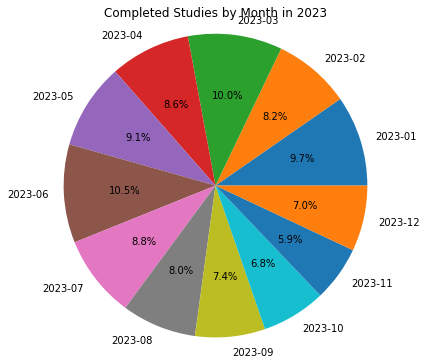

In [0]:
import matplotlib.pyplot as plt
months = [month for month, count in monthly_counts_sorted]
counts = [count for month, count in monthly_counts_sorted]
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=months, autopct='%1.1f%%')
plt.title('Completed Studies by Month in 2023')
plt.axis('equal') 
plt.show()

In [0]:
#Maximum 3 further analyses of the data, motivated by the questions asked (new problem statements other than the above 5 problems)ng 

In [0]:

#Furthur Analysis statement 01: Investigate if there is a correlation between the type of study (e.g., INTERVENTIONAL, OBSERVATIONAL) and the number of completed studies in 2023.
completed_studies_2023 = cleanheaderRDD.filter(lambda x: len(x) >= 14 and x[3] == 'COMPLETED' and x[13].startswith('2023'))
study_type_counts = completed_studies_2023.map(lambda x: (x[11], 1) if len(x) > 11 else (None, 0)).filter(lambda y: y[0] is not None).reduceByKey(lambda a, b: a + b).collect()
study_type_counts_sorted = sorted(study_type_counts, key=lambda x: x[0])
for study_type, count in study_type_counts_sorted:
    print(f"{study_type}: {count}")




Allocation: NA|Intervention Model: CROSSOVER|Masking: NONE|Primary Purpose: OTHER: 3
Allocation: NA|Intervention Model: CROSSOVER|Masking: NONE|Primary Purpose: TREATMENT: 3
Allocation: NA|Intervention Model: PARALLEL|Masking: DOUBLE (PARTICIPANT, INVESTIGATOR)|Primary Purpose: TREATMENT: 1
Allocation: NA|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: BASIC_SCIENCE: 1
Allocation: NA|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: SUPPORTIVE_CARE: 1
Allocation: NA|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT: 4
Allocation: NA|Intervention Model: SEQUENTIAL|Masking: NONE|Primary Purpose: BASIC_SCIENCE: 5
Allocation: NA|Intervention Model: SEQUENTIAL|Masking: NONE|Primary Purpose: DEVICE_FEASIBILITY: 2
Allocation: NA|Intervention Model: SEQUENTIAL|Masking: NONE|Primary Purpose: DIAGNOSTIC: 5
Allocation: NA|Intervention Model: SEQUENTIAL|Masking: NONE|Primary Purpose: HEALTH_SERVICES_RESEARCH: 3
Allocation: NA|Intervention Model: SEQUENTIAL

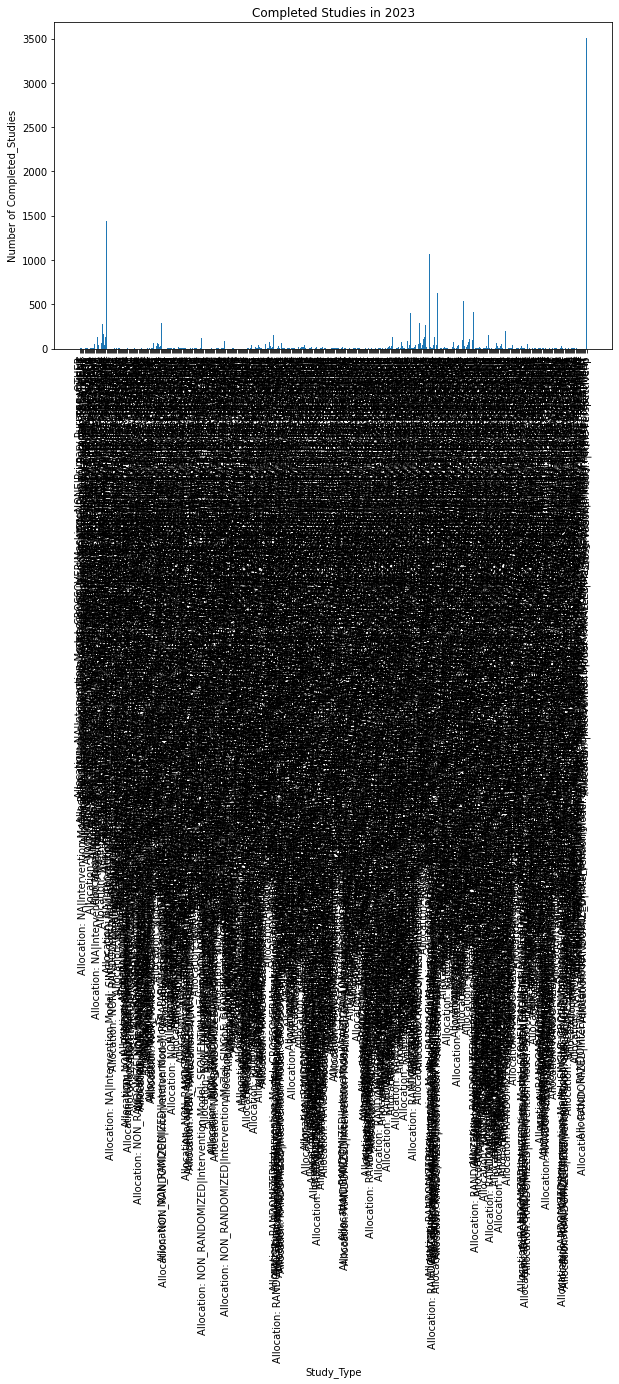

Study Type	Completed Studies
------------------------------
Allocation: NA|Intervention Model: CROSSOVER|Masking: NONE|Primary Purpose: OTHER	3
Allocation: NA|Intervention Model: CROSSOVER|Masking: NONE|Primary Purpose: TREATMENT	3
Allocation: NA|Intervention Model: PARALLEL|Masking: DOUBLE (PARTICIPANT, INVESTIGATOR)|Primary Purpose: TREATMENT	1
Allocation: NA|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: BASIC_SCIENCE	1
Allocation: NA|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: SUPPORTIVE_CARE	1
Allocation: NA|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT	4
Allocation: NA|Intervention Model: SEQUENTIAL|Masking: NONE|Primary Purpose: BASIC_SCIENCE	5
Allocation: NA|Intervention Model: SEQUENTIAL|Masking: NONE|Primary Purpose: DEVICE_FEASIBILITY	2
Allocation: NA|Intervention Model: SEQUENTIAL|Masking: NONE|Primary Purpose: DIAGNOSTIC	5
Allocation: NA|Intervention Model: SEQUENTIAL|Masking: NONE|Primary Purpose: HEALTH_SERVICES_RESEAR

In [0]:
import matplotlib.pyplot as plt
study_types = [study_type for study_type, count in study_type_counts_sorted]
counts = [count for study_type, count in study_type_counts_sorted]
plt.figure(figsize=(10, 6))
plt.bar(study_types, counts)
plt.title('Completed Studies in 2023')
plt.xlabel('Study_Type')
plt.ylabel('Number of Completed_Studies')
plt.xticks(rotation=90)
plt.show()

# Print the table of values
print("Study Type\tCompleted Studies")
print("-" * 30)
for study_type, count in study_type_counts_sorted:
    print(f"{study_type}\t{count}")



In [0]:

#Furthur Analysis statement 02
# I am checking if  the study design (e.g., randomized, observational, crossover) has an impact on the number of completed studies in 2023.

completed_studies_2023 = cleanheaderRDD.filter(lambda x: len(x) >= 14 and x[3] == 'COMPLETED' and x[13].startswith('2023'))
study_design_counts = completed_studies_2023.map(lambda x: (x[10], 1) if len(x) > 10 else (None, 0)).filter(lambda y: y[0] is not None).reduceByKey(lambda a, b: a + b).collect()
study_design_counts_sorted = sorted(study_design_counts, key=lambda x: x[0])
for study_design, count in study_design_counts_sorted:
    print(f"{study_design}: {count}")




INTERVENTIONAL: 11960
OBSERVATIONAL: 3507


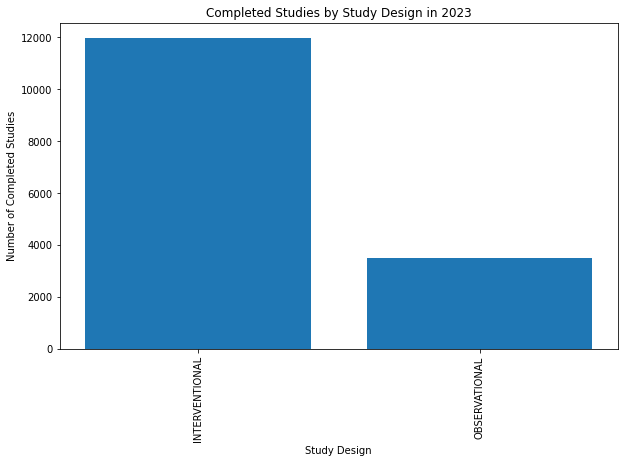

In [0]:
import matplotlib.pyplot as plt
study_designs = [study_design for study_design, count in study_design_counts_sorted]
counts = [count for study_design, count in study_design_counts_sorted]
plt.figure(figsize=(10, 6))
plt.bar(study_designs, counts)
plt.title('Completed Studies by Study Design in 2023')
plt.xlabel('Study Design')
plt.ylabel('Number of Completed Studies')
plt.xticks(rotation=90)

plt.show()


In [0]:
#Furthur Analysis statement 03
 Analyze the impact of the sponsor type (e.g., government, industry, academic) on the number of completed studies in 2023.
completed_studies_2023 = cleanheaderRDD.filter(lambda x: len(x) >= 14 and x[3] == 'COMPLETED' and x[13].startswith('2023'))
sponsor_type_counts = completed_studies_2023.map(lambda x: (x[9], 1) if len(x) > 9 else (None, 0)).filter(lambda y: y[0] is not None).reduceByKey(lambda a, b: a + b).collect()
sponsor_type_counts_sorted = sorted(sponsor_type_counts, key=lambda x: x[0])
for sponsor_type, count in sponsor_type_counts_sorted:
    print(f"{sponsor_type}: {count}")


FED: 101
INDIV: 4
INDUSTRY: 3675
NETWORK: 94
NIH: 112
OTHER: 11160
OTHER_GOV: 320
UNKNOWN: 1


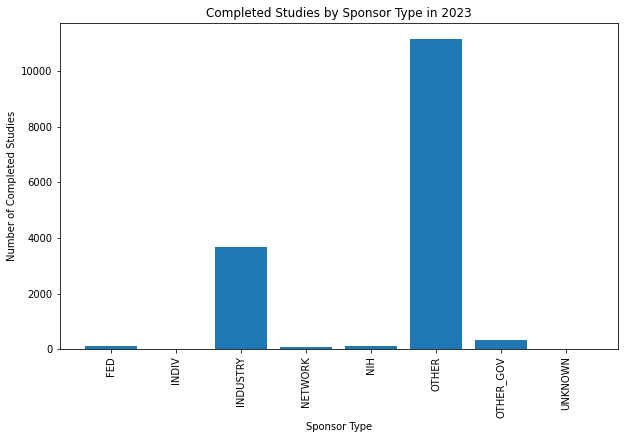

In [0]:
import matplotlib.pyplot as plt
sponsor_types = [sponsor_type for sponsor_type, count in sponsor_type_counts_sorted]
counts = [count for sponsor_type, count in sponsor_type_counts_sorted]
plt.figure(figsize=(10, 6))
plt.bar(sponsor_types, counts)
plt.title('Completed Studies by Sponsor Type in 2023')
plt.xlabel('Sponsor Type')
plt.ylabel('Number of Completed Studies')
plt.xticks(rotation=90)
plt.show()
